# Re-merging of a split image

In [10]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("/Users/sridhargk/code/sridhar211/SRGANupscaling/raw_data/Flickr/original_images/im10.jpg")

In [42]:
img_height, img_width, channels = image.shape
img_height, img_width

(333, 500)

In [52]:
def find_split_size(img_height, img_width):
    '''
    Determines the ideal shape and size for spliting images of input size 
    '''
    height_options = [i for i in range(32,img_height) if img_height%i== 0] 
    width_options = [i for i in range(32,img_width) if img_width%i== 0]
    tile_height = height_options[-1]
    tile_width = width_options[-1]
    n_rows=img_height // tile_height
    n_cols=img_width // tile_width
    return n_rows, n_cols, tile_height, tile_width
    

In [54]:
n_rows, n_cols, tile_height, tile_width = find_split_size(img_height, img_width)
n_rows, tile_height, n_cols, tile_width

(3, 111, 2, 250)

In [49]:
def image_split(image: np.ndarray, kernel_size: tuple, kernel_shape: tuple):
    '''
    Split image into batches of size = kernel_size
    Output is np array of shape (Batch size, height, width, rgb channels)
    '''
    tile_height, tile_width = kernel_size
    rows, cols = kernel_shape

    tiled_array = image.reshape(rows,tile_height,
                                cols,tile_width,
                                channels)
    tiled_array = tiled_array.swapaxes(1, 2)
    return tiled_array.reshape(-1,tile_height,tile_width, channels)

(6, 111, 250, 3)

In [56]:
tiles = image_split(image, (tile_height, tile_width), (n_rows,n_cols))

tiles.shape

(6, 111, 250, 3)

In [57]:
from SRGANupscaling.model import image_upscale

tiles_upscale = np.asarray(image_upscale(tiles))
tiles_upscale.shape

(6, 444, 1000, 3)

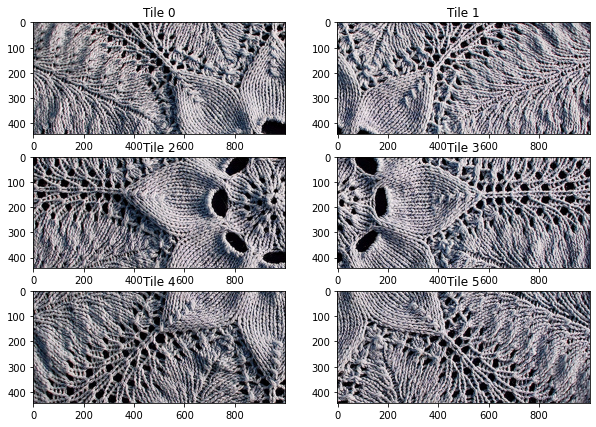

In [58]:
for i, tile in enumerate(tiles_upscale):
    plt.figure(1, figsize = (10, 7))
    plt.subplot(n_rows,n_cols, i+1)
    plt.imshow(tile)
    plt.title(f'Tile {i}')

In [73]:
image_block=[]
index=0
for i in range(n_rows):
    image_cols=[]
    for j in range(n_cols):
        image_cols.append(tiles_upscale[index])
        index+=1
    image_block.append(np.concatenate(image_cols,axis=1))
image_final = np.concatenate(image_block, axis=0)   
np.array(image_final).shape

(1332, 2000, 3)

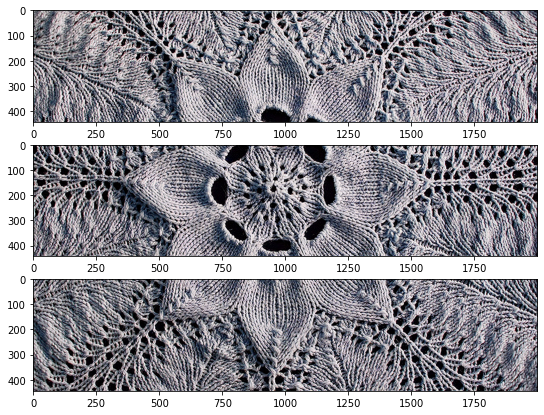

In [74]:
plt.figure(figsize=(10, 7))
plt.subplot(311)
plt.imshow(image_block[0])
plt.subplot(312)
plt.imshow(image_block[1])
plt.subplot(313)
plt.imshow(image_block[2])
plt.show;

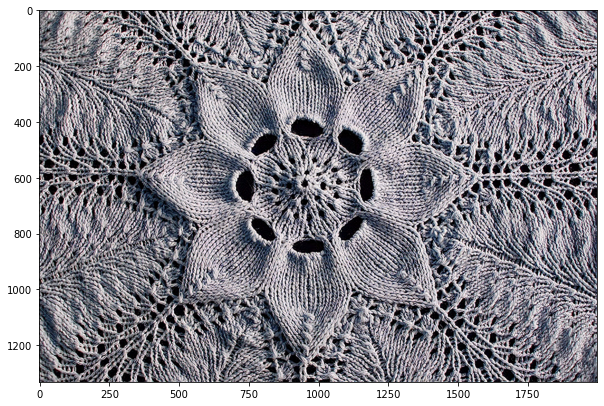

In [75]:
plt.figure(figsize=(10, 7))
plt.imshow(image_final);

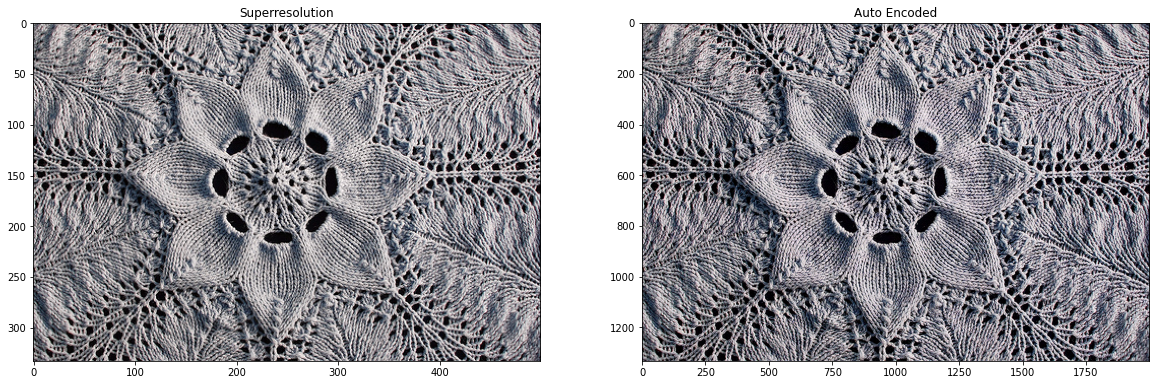

In [76]:
from SRGANupscaling.data import plot_encode_comparison
plot_encode_comparison(image,image_final)

In [36]:
cv2.imwrite('1.jpg',image_final)

True